XGBoost

Importing the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import plot_tree
import pandas as pd

Importing the dataset

In [13]:
dataset = pd.read_csv('churn_modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, -1].values

Encoding categorical data

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
labelEncoder_X1 = LabelEncoder()
labelEncoder_X2 = LabelEncoder()
X[:, 1] = labelEncoder_X1.fit_transform(X[:, 1])
X[:, 2] = labelEncoder_X2.fit_transform(X[:, 2])

In [16]:
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [3])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)
X = ct.fit_transform(X)

Spliting the dataset into the Training set & Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Fitting XGBoost to the Training set

In [18]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Predicting the Test set results

In [19]:
y_pred = classifier.predict(X_test)

Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Applying K-Fold Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

0.013238202294873715

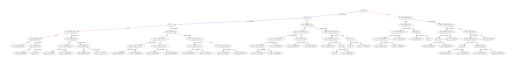

In [22]:
plot_tree(classifier)
plt.show()